## About

A [bubble map](/bubble-plot) is a map combined with a scatter plot where the size of each bubble corresponds to specific **numerical values**. In the example below, the map illustrates **earthquake locations** globally, with the bubble size representing their depth.

This chart has been created by [Joseph Barbier](https://barbierjoseph.com). Thanks to him for accepting sharing its work here!

As a teaser, here is the plot we’re gonna try building:

![bubble map](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-bubble-map-with-arrows.png?raw=true)


## Libraries

First, we need to install the following libraries:

- [matplotlib](/matplotlib) and `geoplot`: for creating the plot
- [pandas](/pandas) and `geopandas`: for data manipulation
- [highlight_text](/advanced-custom-annotations-matplotlib): for annotations
- `geoplot` and `cartopy` for geospatial manipulation


In [1]:
# data manipulation
import numpy as np
import pandas as pd
import geopandas as gpd

# visualization
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch

# geospatial manipulation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geoplot
import geoplot.crs as gcrs

## Dataset

In order to create a [bubble map](/bubble-map), we need **2 kind of datasets**:

- a dataset with **country shapes**, that we load with the following code:


In [2]:
proj = ccrs.Mercator()

url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/all_world.geojson"
world = gpd.read_file(url)
world = world[~world['name'].isin(["Antarctica", "Greenland"])]
world = world.to_crs(proj.proj4_init)
world.head()

name                                           geometry
0                      Fiji  MULTIPOLYGON (((20037508.343 -1800679.237, 200...
1                  Tanzania  POLYGON ((3774143.866 -105050.440, 3792946.708...
2                 W. Sahara  POLYGON ((-964649.018 3185897.152, -964597.245...
3                    Canada  MULTIPOLYGON (((-13674486.249 6242596.000, -13...
4  United States of America  MULTIPOLYGON (((-13674486.249 6242596.000, -13...

- a dataset with **latitude and longitude** values, and another **numerical column**:


In [3]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/earthquakes.csv"
url = "../../static/data/earthquakes.csv"
df = pd.read_csv(url)
df = df[df['Depth (km)']>=0.01] # depth of at least 10 meters
df.sort_values(by='Depth (km)', ascending=False, inplace=True)
df.head()

Date Time (utc)                          Region  Magnitude  \
7961   20/02/2019   06:50:47                       Banda Sea        5.0   
6813   07/07/2019   07:50:53  Eastern New Guinea Reg, P.N.G.        5.4   
8293   17/01/2019   14:01:50                    Fiji Islands        4.7   
11258  03/01/2018   06:42:58             Fiji Islands Region        5.5   
9530   06/09/2018   18:22:24             Fiji Islands Region        5.8   

       Depth (km)  Latitude  Longitude Mode Map    year  
7961         2026     -6.89     129.15    A   -  2019.0  
6813         1010     -5.96     147.90    A   -  2019.0  
8293          689    -18.65     179.44    A   -  2019.0  
11258         677    -19.93    -178.89    A   -  2018.0  
9530          672    -18.88     179.30    A   -  2018.0

## Simple background map

We start this reproduction by creating the **most simple** [background map](/map) possible. It only uses the `world` dataset:


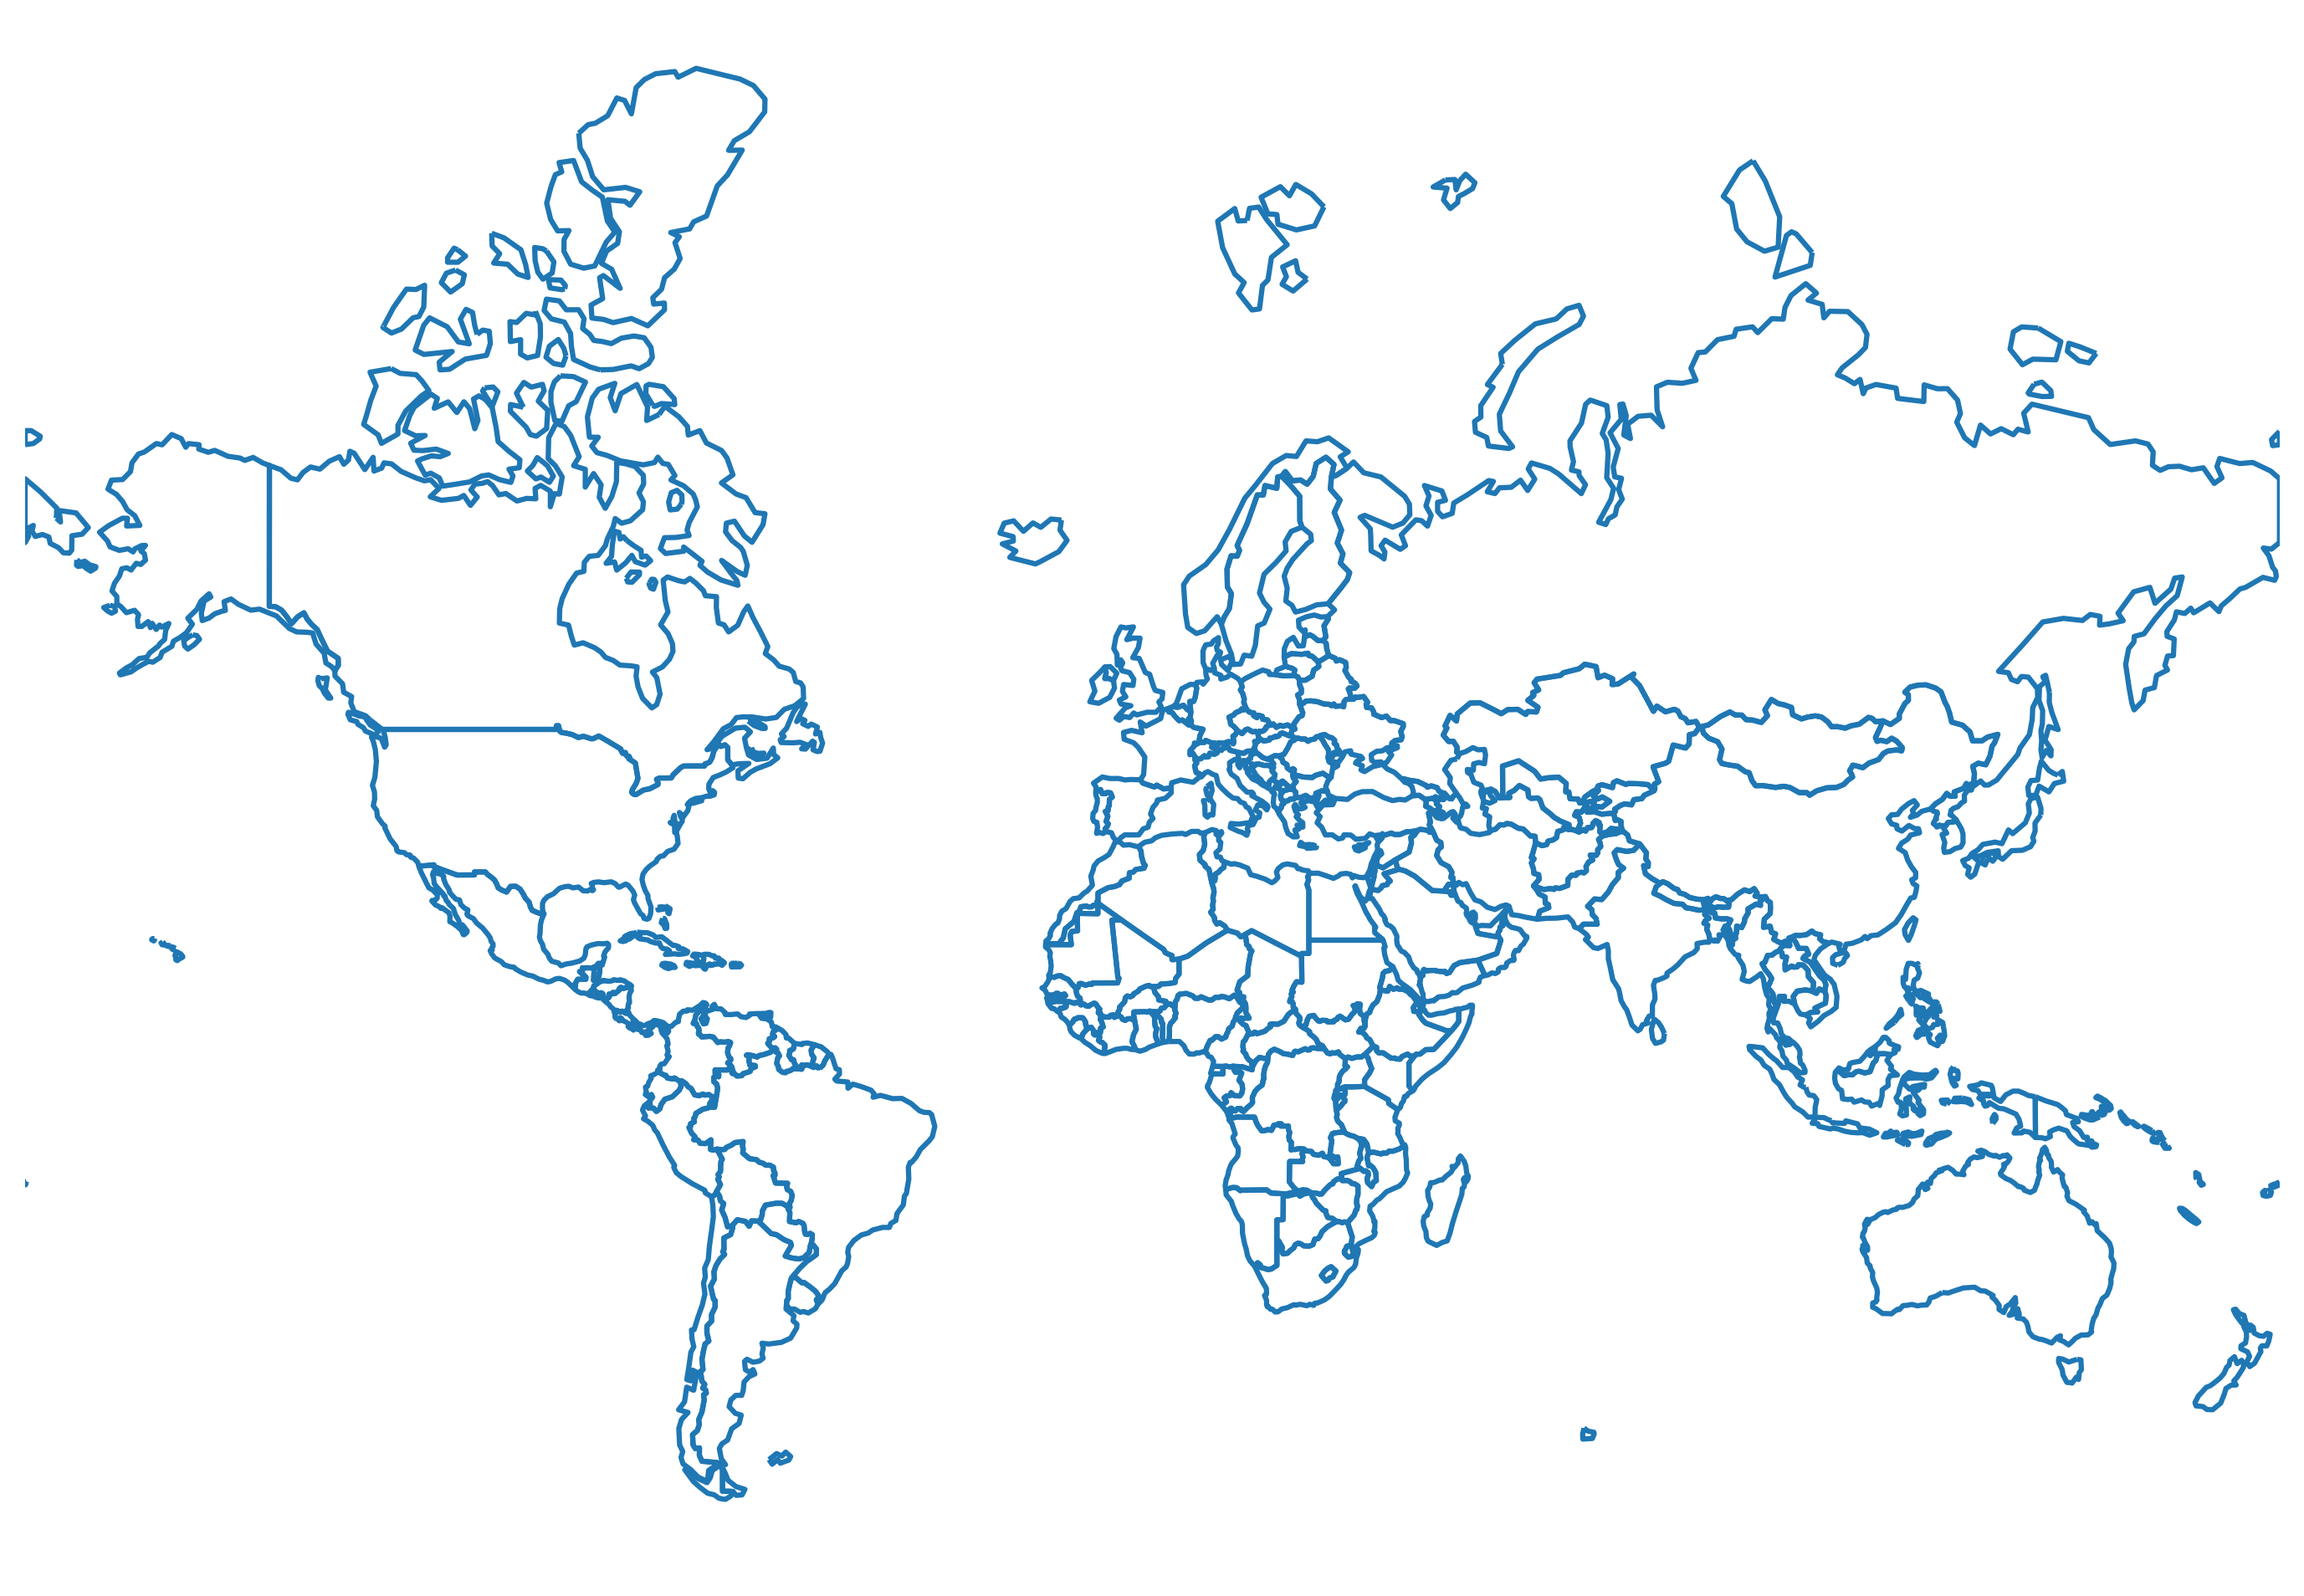

In [4]:
proj = ccrs.Mercator()
fig, ax = plt.subplots(figsize=(12, 8), dpi=300, subplot_kw={'projection':proj})
ax.set_axis_off()

# background map
world.boundary.plot(ax=ax)

plt.show()

## Bubble map

The next step is to **add earthquakes (bubbles)** on the map.

For this, we need to **transform the latitude and longitude into the choosen projection** (defined with `proj`) using the `transform_points()` function. Once we have done so, we just use the `scatter()` function from [matplotlib](/matplotlib):


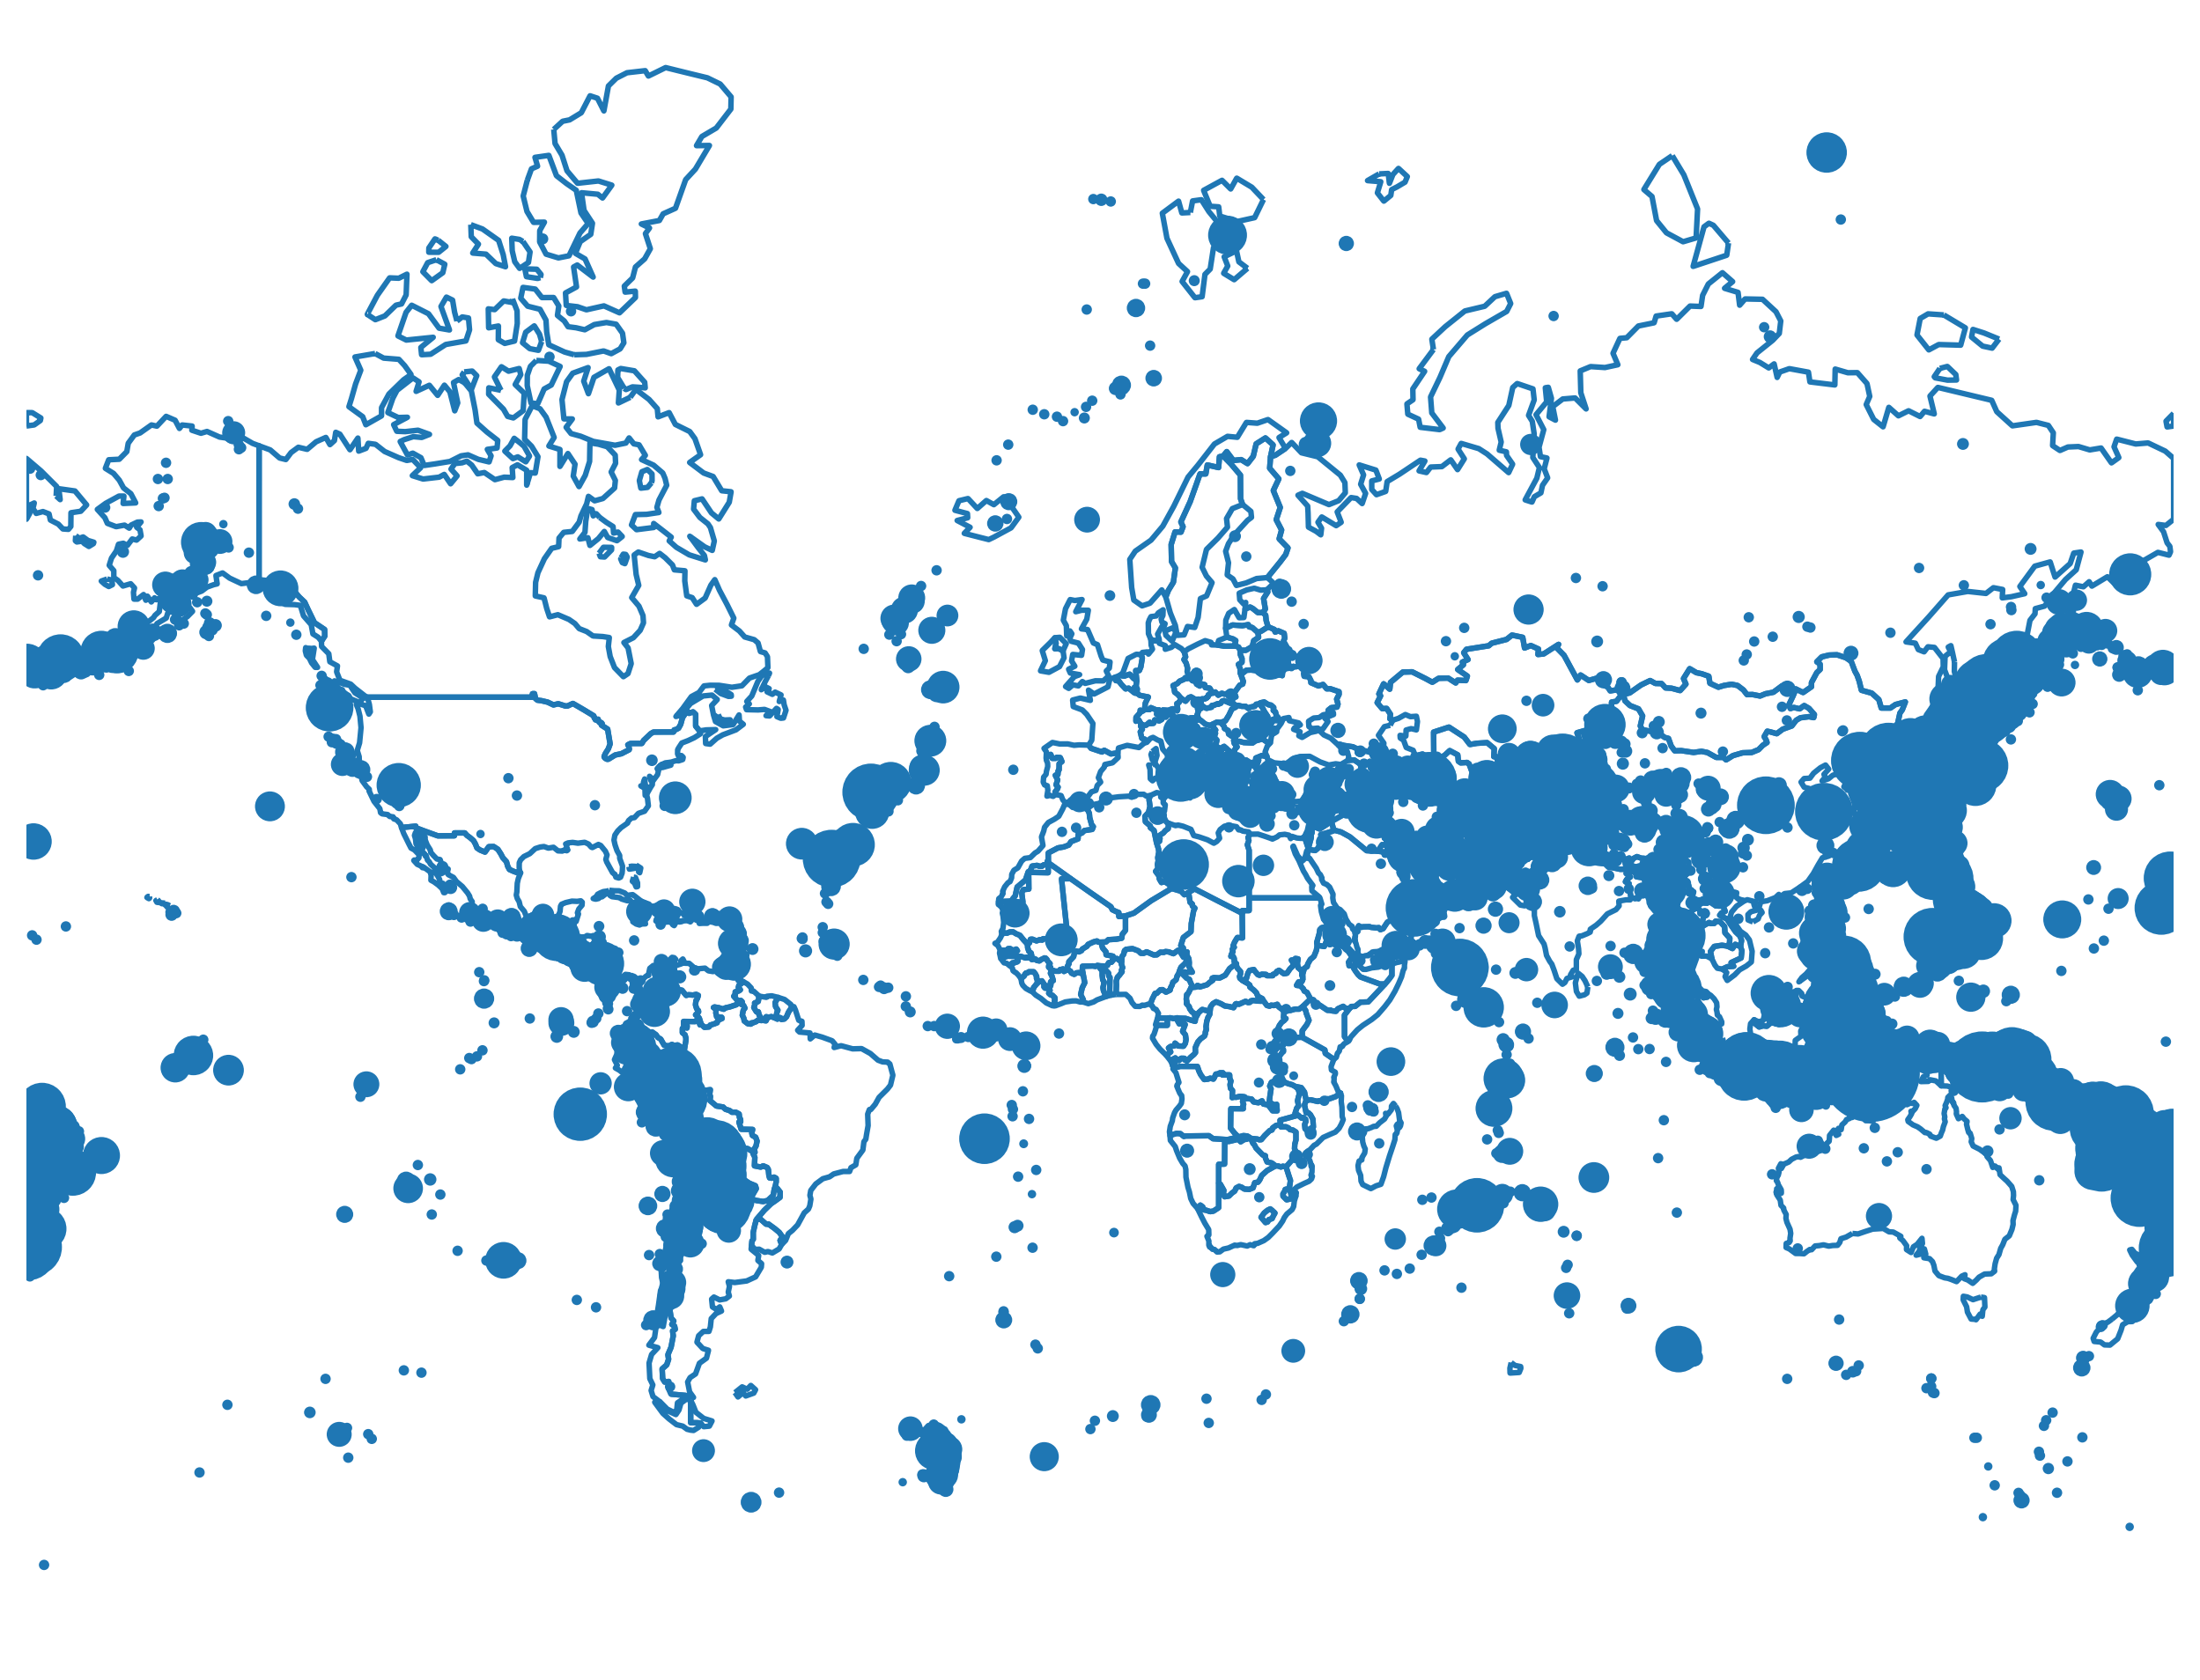

In [5]:
proj = ccrs.Mercator()
fig, ax = plt.subplots(figsize=(12, 8), dpi=300, subplot_kw={'projection':proj})
ax.set_axis_off()

# background map
world.boundary.plot(ax=ax)

# transform the coordinates to the projection's CRS
pc = ccrs.PlateCarree()
new_coords = proj.transform_points(pc, df['Longitude'].values, df['Latitude'].values)

# bubble on top of the map
ax.scatter(
   new_coords[:, 0], new_coords[:, 1],
   s=df['Depth (km)']/3, # size of the bubbles
   zorder=10, # this specifies to put bubbles on top of the map
)

plt.show()

## Customize colors

Now that the base of the map is here, we want to give it a **better style**. For this, we:

- change backround color with the `set_facecolor()` function
- change bubble color with the `color` argument
- change map edge colors with the `edgecolor` argument


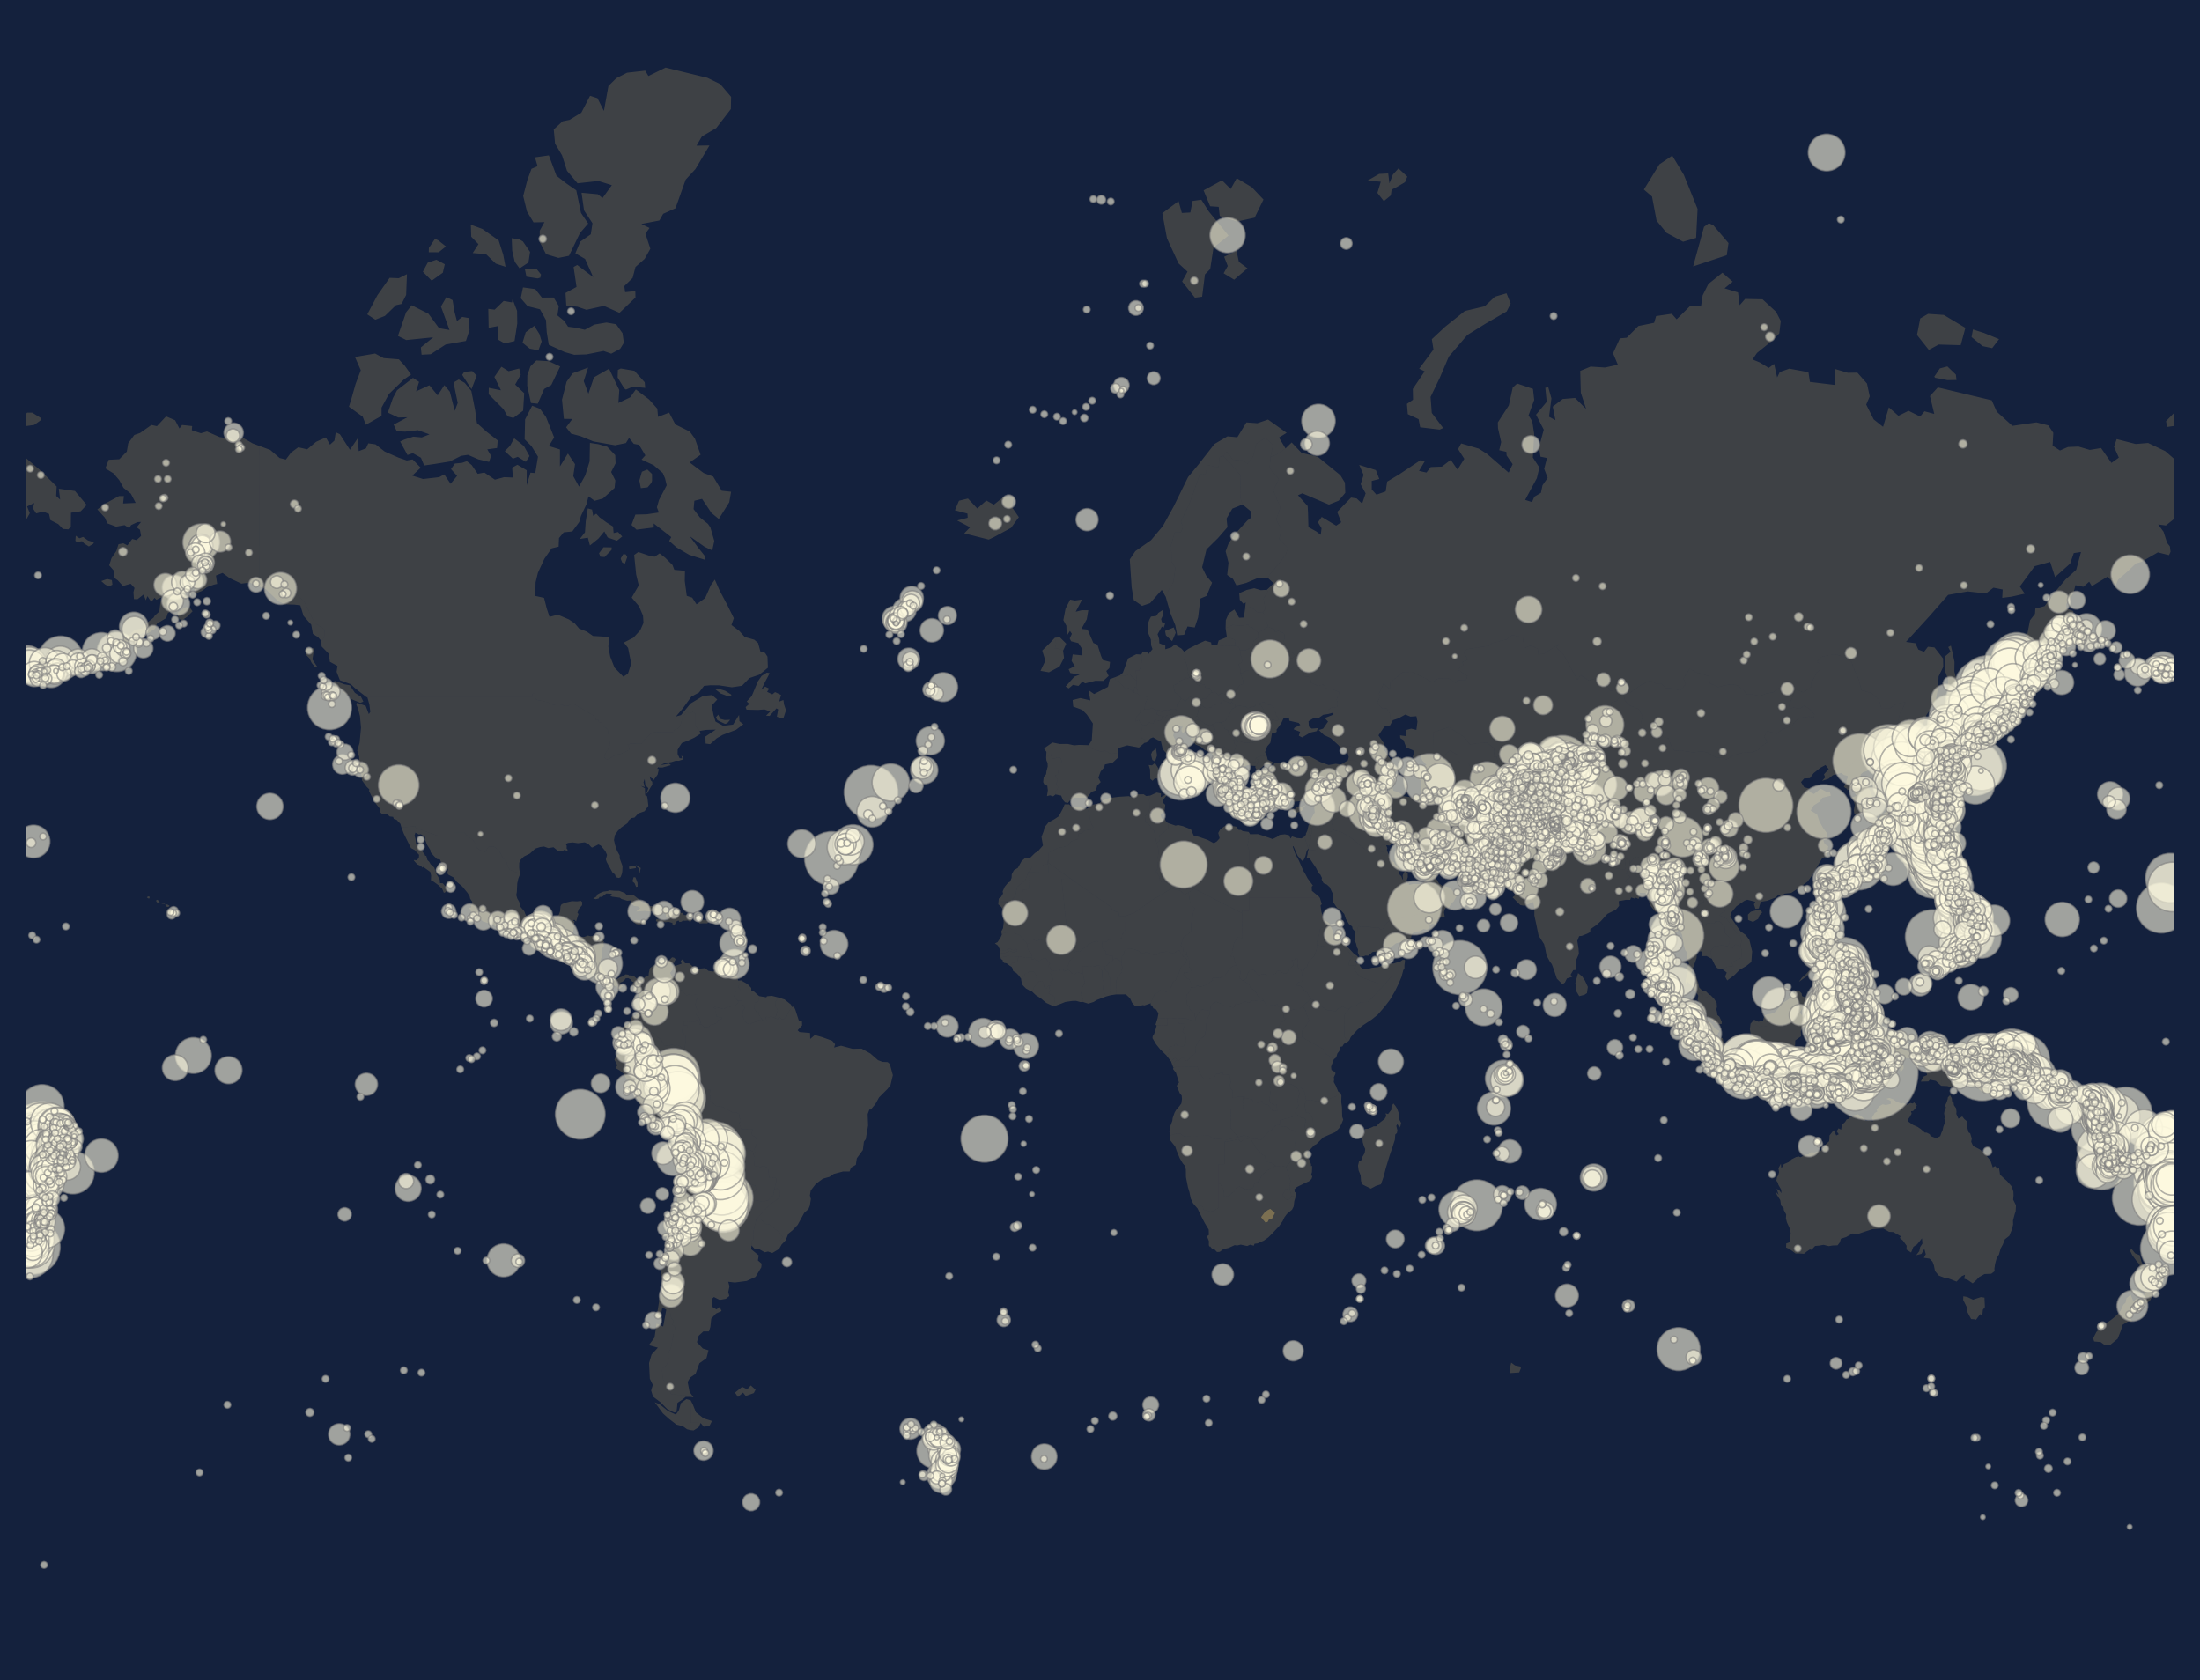

In [6]:
# colors
background_color = '#14213d'
map_color = (233/255, 196/255, 106/255, 0.2)
bubble_color = '#fefae0'

# initialize the figure
proj = ccrs.Mercator()
fig, ax = plt.subplots(figsize=(12, 8), dpi=300, subplot_kw={'projection':proj})
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_axis_off()

# background map
world.boundary.plot(ax=ax, linewidth=0, facecolor=map_color)

# transform the coordinates to the projection's CRS
pc = ccrs.PlateCarree()
new_coords = proj.transform_points(pc, df['Longitude'].values, df['Latitude'].values)

# bubble on top of the map
ax.scatter(
   new_coords[:, 0], new_coords[:, 1],
   s=df['Depth (km)']/3,
   color=bubble_color,
   linewidth=0.4,
   edgecolor='grey',
   alpha=0.6,
   zorder=10,
)

plt.show()

## Title and description

Since the default font isn't very attractive, we load **another font**: for the **title** and the **annotations**. We can then use the `fig_text()` function from the [`highlight_text` library](/advanced-custom-annotations-matplotlib) to add annotations to the map. Check out [this post](/custom-fonts-in-matplotlib) to learn how to use custom fonts in matplotlib.


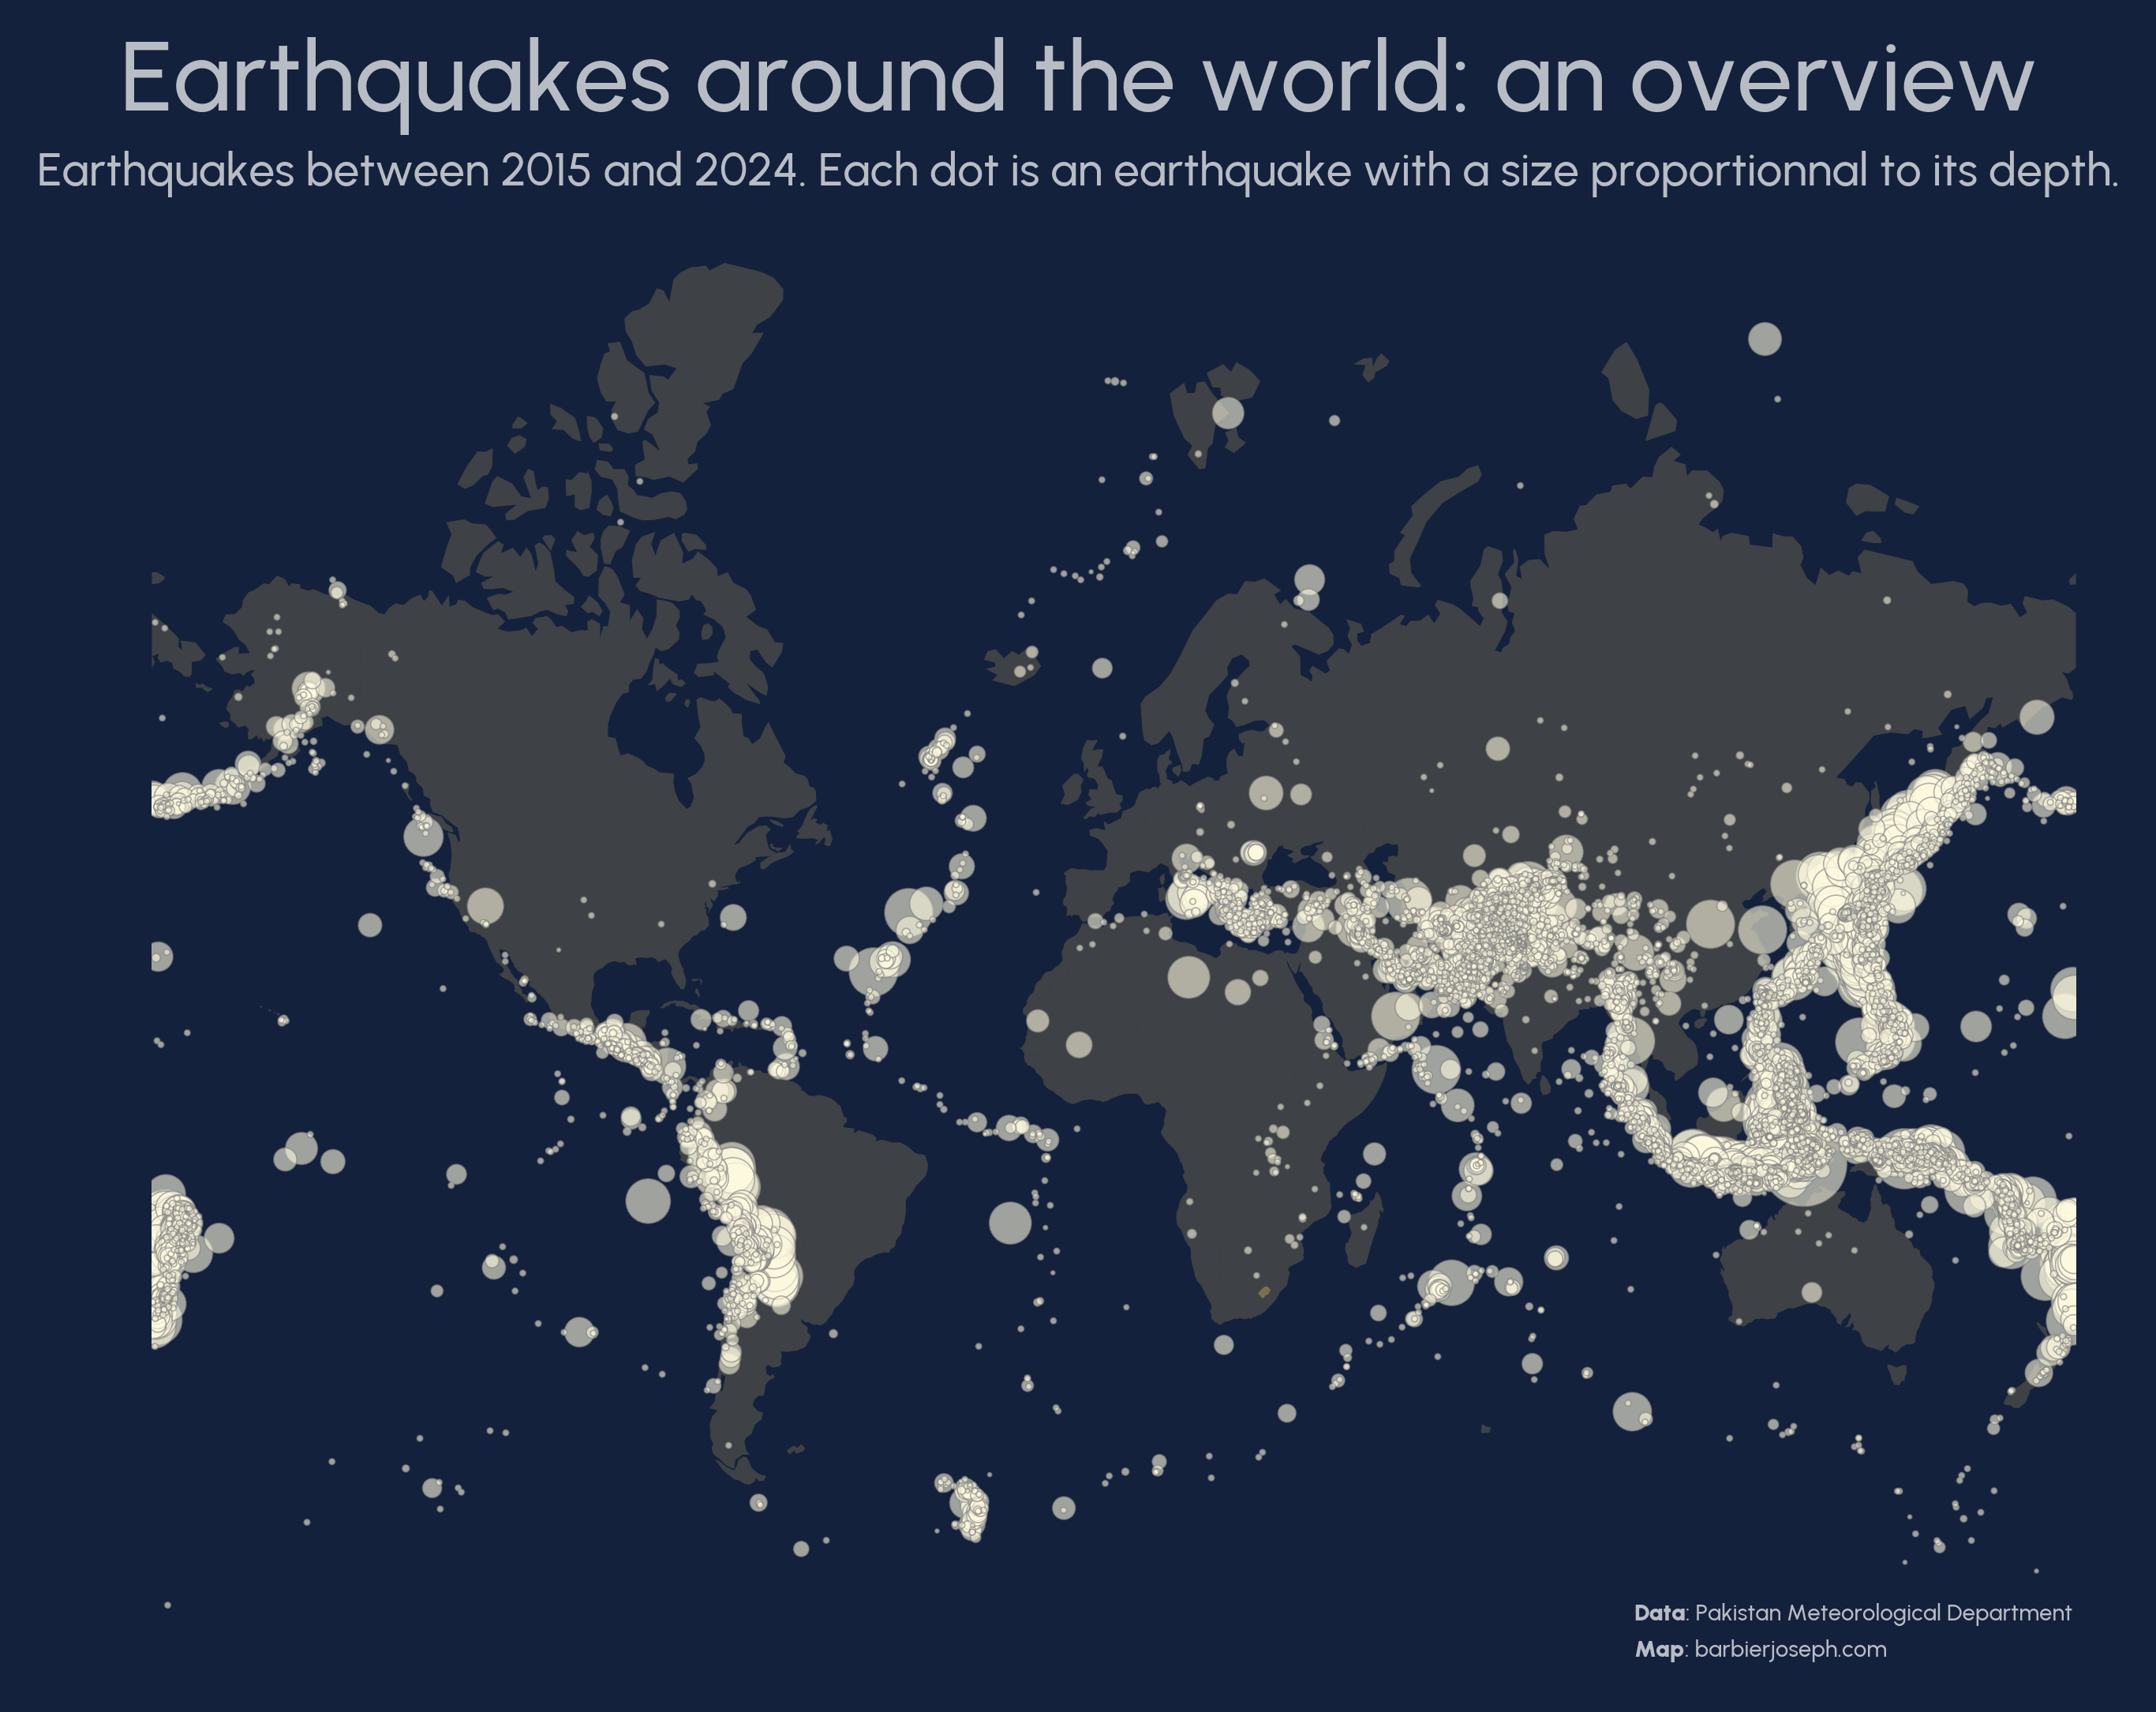

In [7]:
# colors
background_color = '#14213d'
map_color = (233/255, 196/255, 106/255, 0.2)
text_color = 'white'
bubble_color = '#fefae0'
alpha_text = 0.7

# !!! change it to your path
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'Urbanist-Medium.ttf'
font = FontProperties(fname=font_path)
font_path = personal_path + 'Urbanist-Black.ttf'
bold_font = FontProperties(fname=font_path)

# initialize the figure
proj = ccrs.Mercator()
fig, ax = plt.subplots(figsize=(12, 8), dpi=300, subplot_kw={'projection':proj})
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_axis_off()

# background map
world.boundary.plot(ax=ax, linewidth=0, facecolor=map_color)

# transform the coordinates to the projection's CRS
pc = ccrs.PlateCarree()
new_coords = proj.transform_points(pc, df['Longitude'].values, df['Latitude'].values)

# bubble on top of the map
ax.scatter(
   new_coords[:, 0], new_coords[:, 1],
   s=df['Depth (km)']/3,
   color=bubble_color,
   linewidth=0.4,
   edgecolor='grey',
   alpha=0.6,
   zorder=10,
)

# title
fig_text(
   x=0.5, y=0.98, s='Earthquakes around the world: an overview',
   color=text_color, fontsize=30, ha='center', va='top', font=font,
   alpha=alpha_text
)

# subtitle
fig_text(
   x=0.5, y=0.92, s='Earthquakes between 2015 and 2024. Each dot is an earthquake with a size proportionnal to its depth.',
   color=text_color, fontsize=14, ha='center', va='top', font=font, alpha=alpha_text
)

# credit
text = """
<Data>: Pakistan Meteorological Department
<Map>: barbierjoseph.com
"""
fig_text(
   x=0.85, y=0.16, s=text, color=text_color, fontsize=7, ha='right', va='top',
   font=font, highlight_textprops=[{'font': bold_font}, {'font': bold_font}],
   alpha=alpha_text
)

plt.show()

## Arrows and annotations

Same as title and description: we use the `fig_text()` function from the [highlight_text](/advanced-custom-annotations-matplotlib) **library** to add the **annotation**.

The **arrow** is added using the `draw_arrow()` **function** defined below. It uses the `FancyArrowPatch` class from the `matplotlib.patches` **module**.


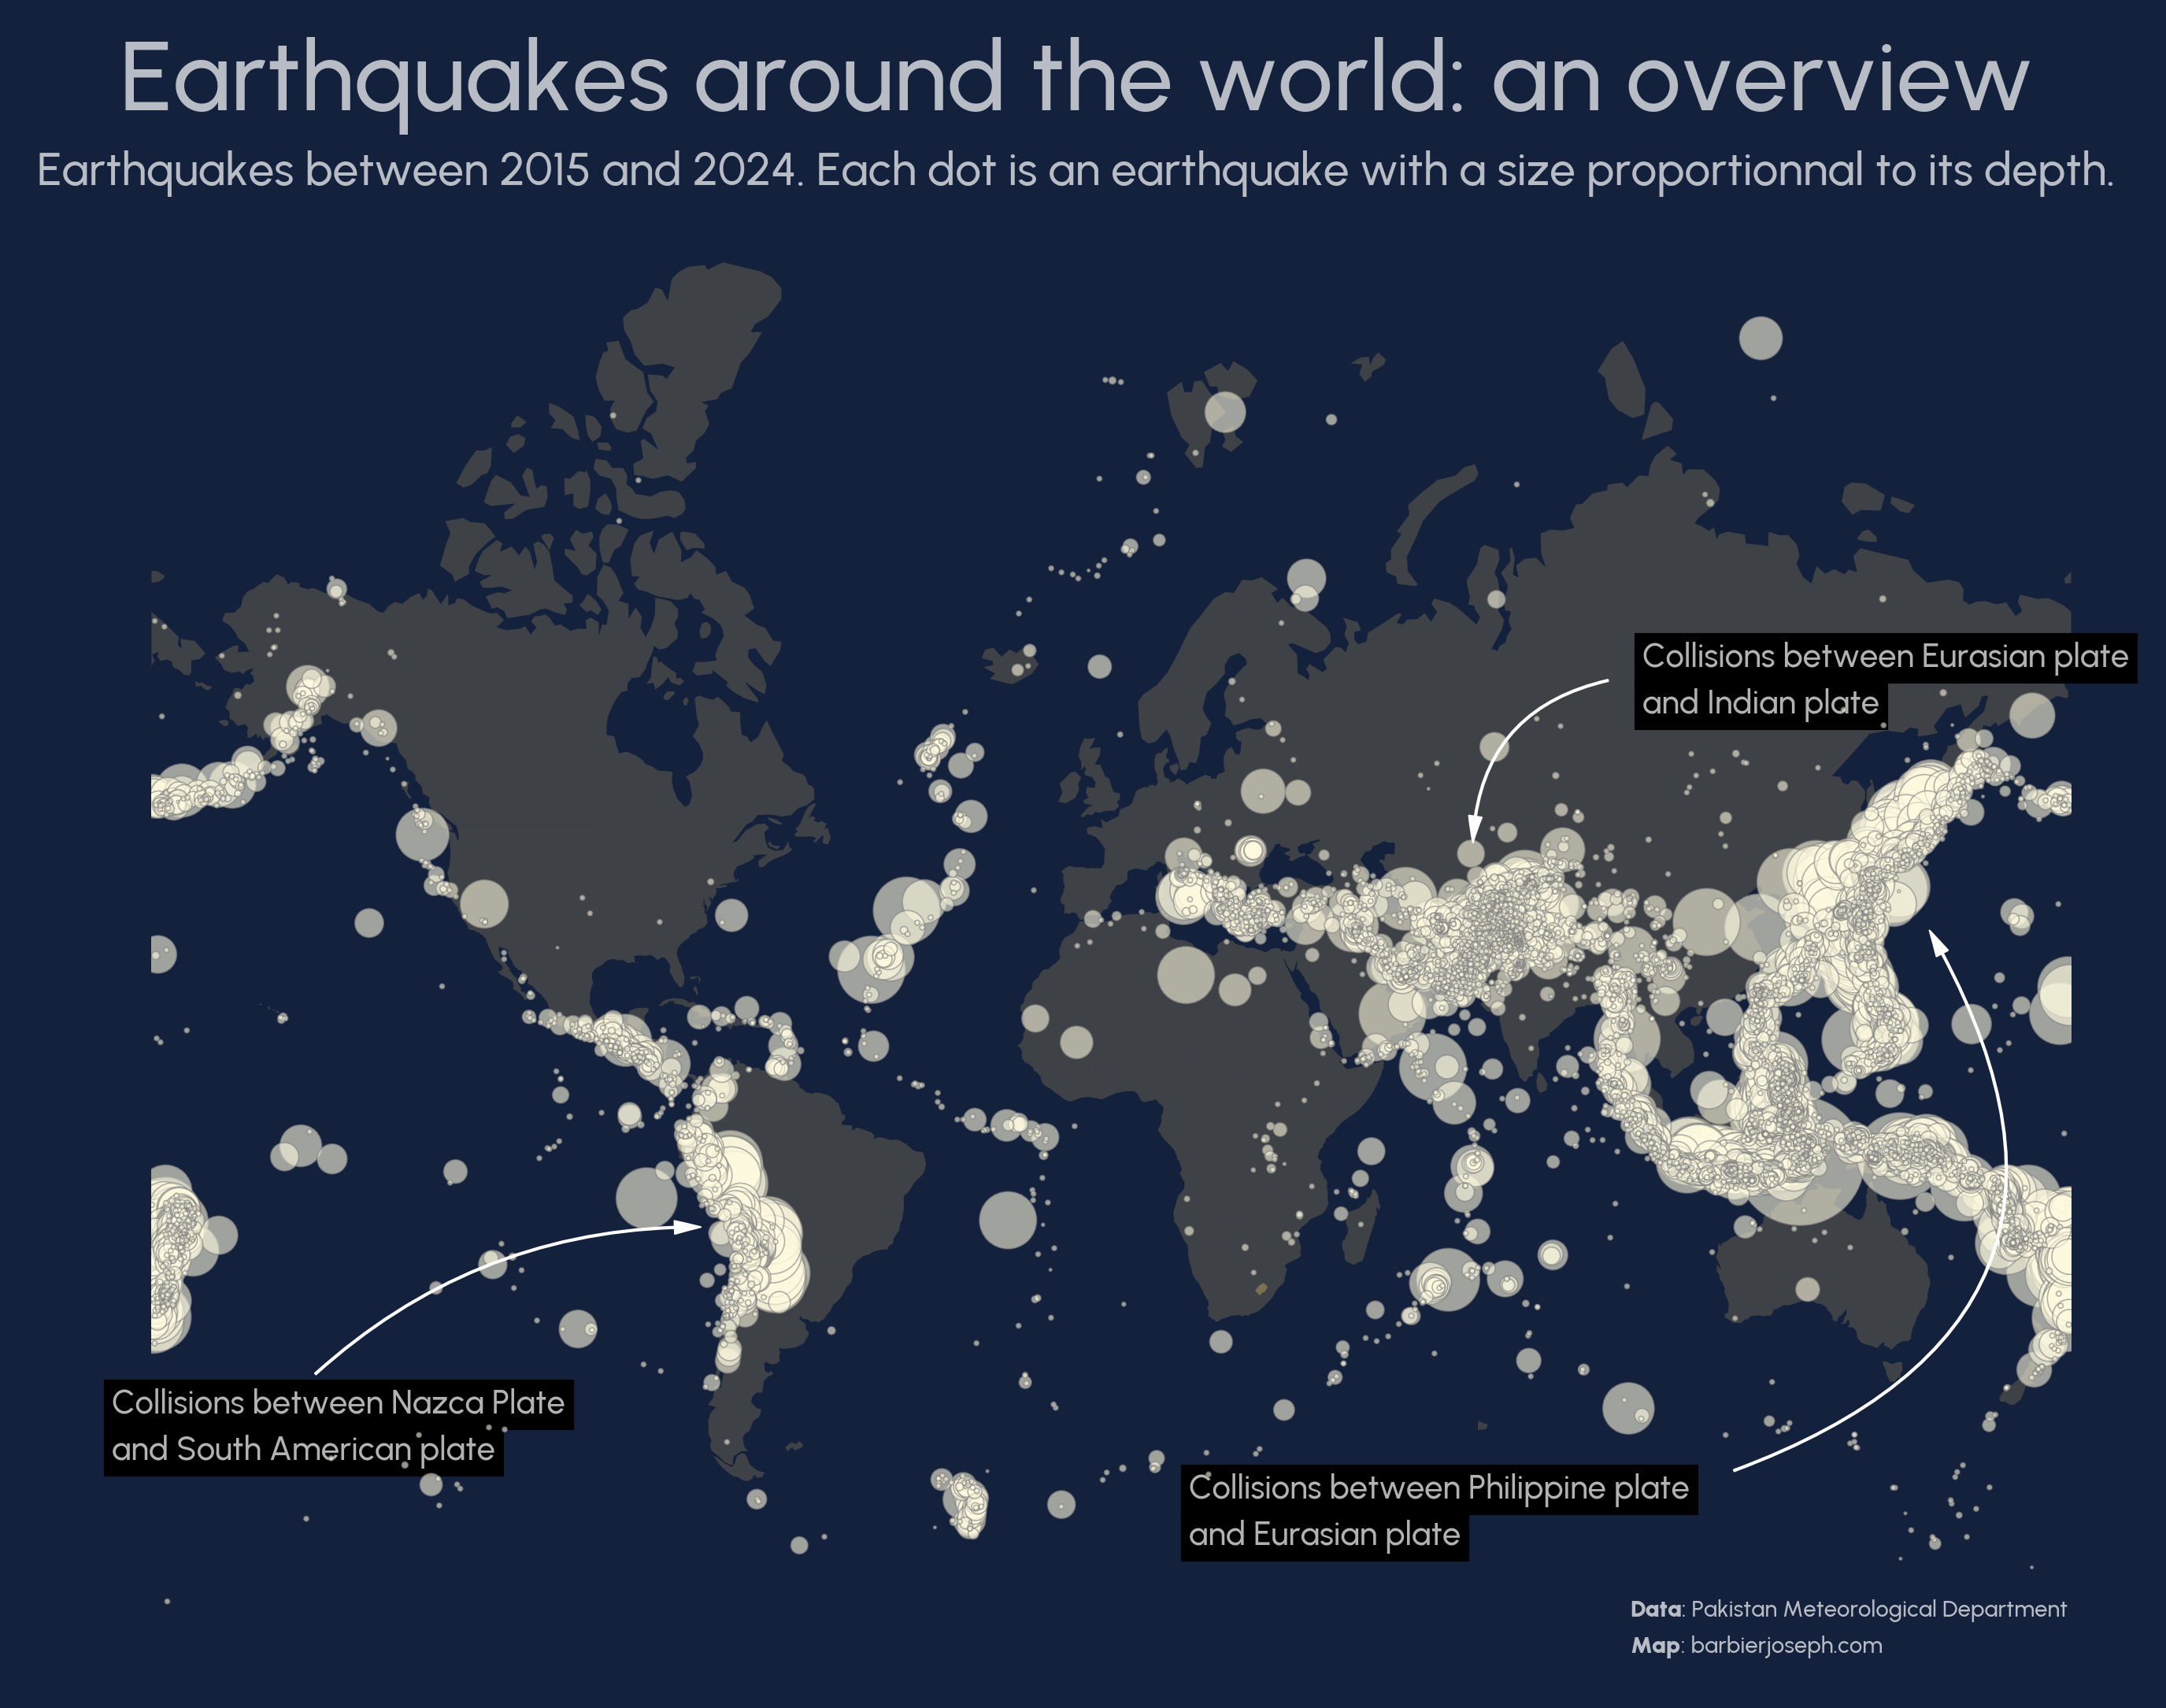

In [1]:
# data manipulation
import numpy as np
import pandas as pd
import geopandas as gpd

# visualization
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch

# geospatial manipulation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geoplot
import geoplot.crs as gcrs

proj = ccrs.Mercator()

url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/all_world.geojson"
world = gpd.read_file(url)
world = world[~world['name'].isin(["Antarctica", "Greenland"])]
world = world.to_crs(proj.proj4_init)
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/earthquakes.csv"
url = "../../static/data/earthquakes.csv"
df = pd.read_csv(url)
df = df[df['Depth (km)']>=0.01] # depth of at least 10 meters
df.sort_values(by='Depth (km)', ascending=False, inplace=True)

def draw_arrow(tail_position, head_position, invert=False, radius=0.5, color='black', fig=None):
   if fig is None:
      fig = plt.gcf()
   kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=color, lw=0.5)
   if invert:
      connectionstyle = f"arc3,rad=-{radius}"
   else:
      connectionstyle = f"arc3,rad={radius}"
   a = FancyArrowPatch(
      tail_position, head_position,
      connectionstyle=connectionstyle,
      transform=fig.transFigure,
      **kw
   )
   fig.patches.append(a)

# !!! change it to your path
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'Urbanist-Medium.ttf'
font = FontProperties(fname=font_path)
font_path = personal_path + 'Urbanist-Black.ttf'
bold_font = FontProperties(fname=font_path)

# colors
background_color = '#14213d'
map_color = (233/255, 196/255, 106/255, 0.2)
text_color = 'white'
bubble_color = '#fefae0'
alpha_text = 0.7

# initialize the figure
fig, ax = plt.subplots(figsize=(12, 8), dpi=300, subplot_kw={'projection': proj})
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_axis_off()

# background map
world.boundary.plot(ax=ax, linewidth=0, facecolor=map_color)

# transform the coordinates to the projection's CRS
pc = ccrs.PlateCarree()
new_coords = proj.transform_points(pc, df['Longitude'].values, df['Latitude'].values)

# bubble on top of the map
ax.scatter(
   new_coords[:, 0], new_coords[:, 1],
   s=df['Depth (km)'] * np.log(df['Depth (km)']) /10,
   color=bubble_color,
   linewidth=0.4,
   edgecolor='grey',
   alpha=0.6,
   zorder=10,
)

# title
fig_text(
   x=0.5, y=0.98, s='Earthquakes around the world: an overview',
   color=text_color, fontsize=30, ha='center', va='top', font=font,
   alpha=alpha_text
)

# subtitle
fig_text(
   x=0.5, y=0.92, s='Earthquakes between 2015 and 2024. Each dot is an earthquake with a size proportionnal to its depth.',
   color=text_color, fontsize=14, ha='center', va='top', font=font, alpha=alpha_text
)

# credit
text = """
<Data>: Pakistan Meteorological Department
<Map>: barbierjoseph.com
"""
fig_text(
   x=0.85, y=0.16, s=text, color=text_color, fontsize=7, ha='right', va='top',
   font=font, highlight_textprops=[{'font': bold_font}, {'font': bold_font}],
   alpha=alpha_text
)

# nazaca plate
highlight_textprops = [
   {"bbox": {"facecolor": "black", "pad": 2, "alpha": 1}, "alpha": alpha_text},
   {"bbox": {"facecolor": "black", "pad": 2, "alpha": 1}, "alpha": alpha_text}
]
draw_arrow((0.23, 0.27), (0.37, 0.35), fig=fig, color=text_color, invert=True, radius=0.2)
fig_text(x=0.16, y=0.265, s='<Collisions between Nazca Plate>\n<and South American plate>', fontsize=10, color=text_color, font=font, highlight_textprops=highlight_textprops, zorder=100)

# india plate
draw_arrow((0.69, 0.64), (0.64, 0.55), fig=fig, color=text_color, radius=0.4)
fig_text(x=0.7, y=0.66, s='<Collisions between Eurasian plate>\n<and Indian plate>', fontsize=10, color=text_color, font=font, highlight_textprops=highlight_textprops, zorder=100)

# philippine plate
draw_arrow((0.73, 0.22), (0.8, 0.51), fig=fig, color=text_color, radius=0.6)
fig_text(x=0.54, y=0.22, s='<Collisions between Philippine plate>\n<and Eurasian plate>', fontsize=10, color=text_color, font=font, highlight_textprops=highlight_textprops, zorder=100)

plt.savefig('../../static/graph/web-bubble-map-with-arrows.png', dpi=300, bbox_inches="tight")
plt.show()

## Going further

You might be interested in:

- the [bubble map section](/bubble-plot) of the gallery
- how to create [arrow with an inflexion point](/591-arrows-with-inflexion-point) in a plot
- how to use [the highlight_text package](/advanced-custom-annotations-matplotlib) to add annotations to a plot
- how to create [cartograms](/592-non-contiguous-cartogram-in-python)
- this [very good looking choropleth map](/web-map-with-custom-legend)
